# **Airline Dashboard**

### To the create the visualization for industry statistics, stock fundamental data and employment data

In [72]:
#Importing Libraries
import panel as pn
pn.extension('plotly')

In [73]:
import plotly.express as px
import plotly
import pandas as pd
import hvplot.pandas
from matplotlib import pyplot as plt
import os
from pathlib import Path
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from holoviews import opts
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models.formatters import BasicTickFormatter
import holoviews as hv
from holoviews import opts

## **Reading Cleaned Data for Visualization**

In [74]:
# Imported cleaned csv files in preparation for visualization

# All U.S. Carriers Data
us_passengers_final = pd.read_csv("Data/transportation_statistics(cleaned)/us_passengers_final.csv")
us_flights_final = pd.read_csv("Data/transportation_statistics(cleaned)/us_flights_final.csv")
us_passenger_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/us_passenger_miles_final.csv")
us_seat_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/us_seat_miles_final.csv")
us_load_final = pd.read_csv("Data/transportation_statistics(cleaned)/us_load_final.csv")

# Delta Airlines Data
dal_passengers_final = pd.read_csv("Data/transportation_statistics(cleaned)/dal_passengers_final.csv")
dal_flights_final = pd.read_csv("Data/transportation_statistics(cleaned)/dal_flights_final.csv")
dal_passenger_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/dal_passenger_miles_final.csv")
dal_seat_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/dal_seat_miles_final.csv")
dal_load_final = pd.read_csv("Data/transportation_statistics(cleaned)/dal_load_final.csv")


# Southwest Airlines Data
luv_passengers_final = pd.read_csv("Data/transportation_statistics(cleaned)/luv_passengers_final.csv")
luv_flights_final = pd.read_csv("Data/transportation_statistics(cleaned)/luv_flights_final.csv")
luv_passenger_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/luv_passenger_miles_final.csv")
luv_seat_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/luv_seat_miles_final.csv")
luv_load_final = pd.read_csv("Data/transportation_statistics(cleaned)/luv_load_final.csv")

# United Airlines Data
ual_passengers_final = pd.read_csv("Data/transportation_statistics(cleaned)/ual_passengers_final.csv")
ual_flights_final = pd.read_csv("Data/transportation_statistics(cleaned)/ual_flights_final.csv")
ual_passenger_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/ual_passenger_miles_final.csv")
ual_seat_miles_final = pd.read_csv("Data/transportation_statistics(cleaned)/ual_seat_miles_final.csv")
ual_load_final = pd.read_csv("Data/transportation_statistics(cleaned)/ual_load_final.csv")

In [75]:
# Imported airline fundamentals data files

dal_fundamentals = pd.read_csv("Data/DAL_fundamentals.csv")
luv_fundamentals = pd.read_csv("Data/LUV_fundamentals.csv")
ual_fundamentals = pd.read_csv("Data/UAL_fundamentals.csv")

In [76]:
# Prepared Index

# All U.S. Carriers
us_passengers_final.set_index('Year', inplace=True)
us_flights_final.set_index('Year', inplace=True)
us_passenger_miles_final.set_index('Year', inplace=True)
us_seat_miles_final.set_index('Year', inplace=True)
us_load_final.set_index('Year', inplace=True)

# Delta Airlines
dal_passengers_final.set_index('Year', inplace=True)
dal_flights_final.set_index('Year', inplace=True)
dal_passenger_miles_final.set_index('Year', inplace=True)
dal_seat_miles_final.set_index('Year', inplace=True)
dal_load_final.set_index('Year', inplace=True)

# Southwest Airlines
luv_passengers_final.set_index('Year', inplace=True)
luv_flights_final.set_index('Year', inplace=True)
luv_passenger_miles_final.set_index('Year', inplace=True)
luv_seat_miles_final.set_index('Year', inplace=True)
luv_load_final.set_index('Year', inplace=True)

# United Airlines
ual_passengers_final.set_index('Year', inplace=True)
ual_flights_final.set_index('Year', inplace=True)
ual_passenger_miles_final.set_index('Year', inplace=True)
ual_seat_miles_final.set_index('Year', inplace=True)
ual_load_final.set_index('Year', inplace=True)

In [77]:
# Combing fundamental data for Visualization

# Revenue Data
dal_revenue=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Revenue']]
dal_revenue.set_index('Report Date',inplace=True)
dal_revenue.rename(columns={'Revenue':'DAL Revenue'},inplace=True)
luv_revenue=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Revenue']]
luv_revenue.set_index('Report Date',inplace=True)
luv_revenue.rename(columns={'Revenue':'LUV Revenue'},inplace=True)
ual_revenue=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Revenue']]
ual_revenue.set_index('Report Date',inplace=True)
ual_revenue.rename(columns={'Revenue':'UAL Revenue'},inplace=True)
revenue=pd.concat([dal_revenue,luv_revenue,ual_revenue],axis='columns',join='inner')
revenue.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
revenue.sort_index(inplace=True)
revenue.head()

,DAL Revenue,LUV Revenue,UAL Revenue
Report Date,,,
2011-06-30,9.153000e+09,4.136000e+09,9.809000e+09
2011-09-30,9.816000e+09,4.311000e+09,1.017100e+10
2011-12-31,8.399000e+09,4.108000e+09,8.928000e+09
2012-03-31,8.413000e+09,3.991000e+09,8.602000e+09
2012-06-30,9.732000e+09,4.616000e+09,9.939000e+09


In [78]:
revenue.describe()

,DAL Revenue,LUV Revenue,UAL Revenue
count,3.900000e+01,3.900000e+01,3.900000e+01
mean,9.574051e+09,4.642641e+09,9.130641e+09
std,2.185975e+09,1.031558e+09,2.078338e+09
min,1.468000e+09,1.008000e+09,1.475000e+09
25%,9.112000e+09,4.271500e+09,8.711500e+09
50%,9.816000e+09,4.826000e+09,9.589000e+09
75%,1.072450e+10,5.293000e+09,1.019950e+10
max,1.256000e+10,5.909000e+09,1.140200e+10


In [79]:
#Profit Data
dal_profit=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Net Income']]
dal_profit.set_index('Report Date',inplace=True)
dal_profit.rename(columns={'Net Income':'DAL Net Income'},inplace=True)
luv_profit=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Net Income']]
luv_profit.set_index('Report Date',inplace=True)
luv_profit.rename(columns={'Net Income':'LUV Net Income'},inplace=True)
ual_profit=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Net Income']]
ual_profit.set_index('Report Date',inplace=True)
ual_profit.rename(columns={'Net Income':'UAL Net Income'},inplace=True)
profit=pd.concat([dal_profit,luv_profit,ual_profit],axis='columns',join='inner')
profit.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
profit.sort_index(inplace=True)
profit.head()

,DAL Net Income,LUV Net Income,UAL Net Income
Report Date,,,
2011-06-30,198000000,161000000,538000000
2011-09-30,549000000,-140000000,653000000
2011-12-31,425000000,152000000,-138000000
2012-03-31,124000000,98000000,-448000000
2012-06-30,-168000000,228000000,339000000


In [80]:
#Gross Profit Margin(GPM)
dal_gpm=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Gross Profit Margin']]
dal_gpm.set_index('Report Date',inplace=True)
dal_gpm.rename(columns={'Gross Profit Margin':'DAL Gross Profit Margin'},inplace=True)
luv_gpm=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Gross Profit Margin']]
luv_gpm.set_index('Report Date',inplace=True)
luv_gpm.rename(columns={'Gross Profit Margin':'LUV Gross Profit Margin'},inplace=True)
ual_gpm=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Gross Profit Margin']]
ual_gpm.set_index('Report Date',inplace=True)
ual_gpm.rename(columns={'Gross Profit Margin':'UAL Gross Profit Margin'},inplace=True)
gpm=pd.concat([dal_gpm,luv_gpm,ual_gpm],axis='columns',join='inner')
gpm.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
gpm.sort_index(inplace=True)
gpm.head()

,DAL Gross Profit Margin,LUV Gross Profit Margin,UAL Gross Profit Margin
Report Date,,,
2011-06-30,0.203868,0.220503,0.336120
2011-09-30,0.236145,0.222686,0.337233
2011-12-31,0.243005,0.215190,0.290211
2012-03-31,0.184476,0.181909,0.248779
2012-06-30,0.168413,0.254766,0.312909


In [81]:
#Net Profit Margin (NPM)
dal_npm=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Net Profit Margin']]
dal_npm.set_index('Report Date',inplace=True)
dal_npm.rename(columns={'Net Profit Margin':'DAL Net Profit Margin'},inplace=True)
luv_npm=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Net Profit Margin']]
luv_npm.set_index('Report Date',inplace=True)
luv_npm.rename(columns={'Net Profit Margin':'LUV Net Profit Margin'},inplace=True)
ual_npm=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Net Profit Margin']]
ual_npm.set_index('Report Date',inplace=True)
ual_npm.rename(columns={'Net Profit Margin':'UAL Net Profit Margin'},inplace=True)
npm=pd.concat([dal_npm,luv_npm,ual_npm],axis='columns',join='inner')
npm.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
npm.sort_index(inplace=True)
npm.head()

,DAL Net Profit Margin,LUV Net Profit Margin,UAL Net Profit Margin
Report Date,,,
2011-06-30,0.021632,0.038926,0.054848
2011-09-30,0.055929,-0.032475,0.064202
2011-12-31,0.050601,0.037001,-0.015457
2012-03-31,0.014739,0.024555,-0.052081
2012-06-30,-0.017263,0.049393,0.034108


In [13]:
#Operating Profit Margin (OPM)
dal_opm=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Operating Margin']]
dal_opm.set_index('Report Date',inplace=True)
dal_opm.rename(columns={'Operating Margin':'DAL Operating Margin'},inplace=True)
luv_opm=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Operating Margin']]
luv_opm.set_index('Report Date',inplace=True)
luv_opm.rename(columns={'Operating Margin':'LUV Operating Margin'},inplace=True)
ual_opm=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Operating Margin']]
ual_opm.set_index('Report Date',inplace=True)
ual_opm.rename(columns={'Operating Margin':'UAL Operating Margin'},inplace=True)
opm=pd.concat([dal_opm,luv_opm,ual_opm],axis='columns',join='inner')
opm.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
opm.sort_index(inplace=True) 
opm.head()

,DAL Operating Margin,LUV Operating Margin,UAL Operating Margin
Report Date,,,
2011-06-30,0.068284,0.064072,0.097258
2011-09-30,0.087918,0.057295,0.103726
2011-12-31,0.096916,0.044791,0.032930
2012-03-31,0.043980,0.008770,-0.012439
2012-06-30,0.033600,0.102036,0.078579


In [82]:
#Earnings Per Share (EPS)
dal_EPS=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','EPS']]
dal_EPS.set_index('Report Date',inplace=True)
dal_EPS.rename(columns={'EPS':'DAL EPS'},inplace=True)
luv_EPS=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','EPS']]
luv_EPS.set_index('Report Date',inplace=True)
luv_EPS.rename(columns={'EPS':'LUV EPS'},inplace=True)
ual_EPS=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','EPS']]
ual_EPS.set_index('Report Date',inplace=True)
ual_EPS.rename(columns={'EPS':'UAL EPS'},inplace=True)
EPS=pd.concat([dal_EPS,luv_EPS,ual_EPS],axis='columns',join='inner')
EPS.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
EPS.sort_index(inplace=True)
EPS.head()

,DAL EPS,LUV EPS,UAL EPS
Report Date,,,
2011-06-30,0.236277,0.206410,1.630303
2011-09-30,0.655131,-0.176768,1.978788
2011-12-31,0.506555,0.195876,-0.419453
2012-03-31,0.147094,0.127108,-1.357576
2012-06-30,-0.198817,0.301189,1.024169


In [83]:
#Cash and Cash Equivalents 
dal_cash=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Cash, Cash Equivalents & Short Term Investments']]
dal_cash.set_index('Report Date',inplace=True)
dal_cash.rename(columns={'Cash, Cash Equivalents & Short Term Investments':'DAL Cash & Short Term Investments'},inplace=True)
luv_cash=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Cash, Cash Equivalents & Short Term Investments']]
luv_cash.set_index('Report Date',inplace=True)
luv_cash.rename(columns={'Cash, Cash Equivalents & Short Term Investments':'LUV Cash & Short Term Investments'},inplace=True)
ual_cash=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Cash, Cash Equivalents & Short Term Investments']]
ual_cash.set_index('Report Date',inplace=True)
ual_cash.rename(columns={'Cash, Cash Equivalents & Short Term Investments':'UAL Cash & Short Term Investments'},inplace=True)
cash=pd.concat([dal_cash,luv_cash,ual_cash],axis='columns',join='inner')
cash.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
cash.sort_index(inplace=True)
cash.head()

,DAL Cash & Short Term Investments,LUV Cash & Short Term Investments,UAL Cash & Short Term Investments
Report Date,,,
2011-06-30,3.610000e+09,4.374000e+03,8.579000e+09
2011-09-30,3.265000e+09,3.656000e+09,8.357000e+09
2011-12-31,3.615000e+09,3.144000e+09,7.762000e+09
2012-03-31,3.870000e+09,3.784000e+09,7.273000e+09
2012-06-30,3.498000e+09,3.256000e+09,7.704000e+09


In [84]:
#Quick Ratio (QR)
dal_qr=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Quick Ratio']]
dal_qr.set_index('Report Date',inplace=True)
dal_qr.rename(columns={'Quick Ratio':'DAL Quick Ratio'},inplace=True)
luv_qr=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Quick Ratio']]
luv_qr.set_index('Report Date',inplace=True)
luv_qr.rename(columns={'Quick Ratio':'LUV Quick Ratio'},inplace=True)
ual_qr=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Quick Ratio']]
ual_qr.set_index('Report Date',inplace=True)
ual_qr.rename(columns={'Quick Ratio':'UAL Quick Ratio'},inplace=True)
qr=pd.concat([dal_qr,luv_qr,ual_qr],axis='columns',join='inner')
qr.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
qr.sort_index(inplace=True) 
qr.head()

,DAL Quick Ratio,LUV Quick Ratio,UAL Quick Ratio
Report Date,,,
2011-06-30,0.613878,0.945280,0.931124
2011-09-30,0.578505,0.777256,0.954614
2011-12-31,0.566412,0.870064,0.911181
2012-03-31,0.581489,0.928869,0.850232
2012-06-30,0.548833,0.835630,0.833609


In [85]:
#Debt to Equity Ratio (DE)
dal_de=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Debt-to-Equity Ratio']]
dal_de.set_index('Report Date',inplace=True)
dal_de.rename(columns={'Debt-to-Equity Ratio':'DAL Debt-to-Equity Ratioo'},inplace=True)
luv_de=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Debt-to-Equity Ratio']]
luv_de.set_index('Report Date',inplace=True)
luv_de.rename(columns={'Debt-to-Equity Ratio':'LUV Debt-to-Equity Ratio'},inplace=True)
ual_de=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','Debt-to-Equity Ratio']]
ual_de.set_index('Report Date',inplace=True)
ual_de.rename(columns={'Debt-to-Equity Ratio':'UAL Debt-to-Equity Ratio'},inplace=True)
de=pd.concat([dal_de,luv_de,ual_de],axis='columns',join='inner')
de.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
de.sort_index(inplace=True) 
de.head()

,DAL Debt-to-Equity Ratioo,LUV Debt-to-Equity Ratio,UAL Debt-to-Equity Ratio
Report Date,,,
2011-06-30,17.003344,0.587615,7.002060
2011-09-30,11.860884,0.648574,5.690744
2011-12-31,-10.106734,0.545441,7.051495
2012-03-31,-13.230465,0.465972,8.235762
2012-06-30,-11.453744,0.478947,7.612844


In [86]:
#Return on Equity (ROE)
dal_roe=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','ROE']]
dal_roe.set_index('Report Date',inplace=True)
dal_roe.rename(columns={'ROE':'DAL ROE'},inplace=True)
luv_roe=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','ROE']]
luv_roe.set_index('Report Date',inplace=True)
luv_roe.rename(columns={'ROE':'LUV ROE'},inplace=True)
ual_roe=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','ROE']]
ual_roe.set_index('Report Date',inplace=True)
ual_roe.rename(columns={'ROE':'UAL ROE'},inplace=True)
roe=pd.concat([dal_roe,luv_roe,ual_roe],axis='columns',join='inner')
roe.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
roe.drop('2011-06-30', inplace=True)
roe.drop('2012-09-30', inplace=True)
roe.drop('2013-09-30', inplace=True)
roe.drop('2013-03-31', inplace=True)
roe.sort_index(inplace=True)
roe.head()

,DAL ROE,LUV ROE,UAL ROE
Report Date,,,
2011-09-30,0.449264,-0.021588,0.282439
2011-12-31,-0.304441,0.022103,-0.076412
2012-03-31,-0.122651,0.013809,-0.296689
2012-06-30,0.148018,0.033333,0.207339
2012-12-31,-0.002816,0.011299,-1.288981


In [87]:
#Stock Price Data
dal_price=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','DAL Price']]
dal_price.set_index('Report Date',inplace=True)
dal_price.rename(columns={'DAL Price':'DAL Stock Price'},inplace=True)
luv_price=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','LUv Price']]
luv_price.set_index('Report Date',inplace=True)
luv_price.rename(columns={'LUv Pricee':'LUV Stock Price'},inplace=True)
ual_price=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','UAL Price']]
ual_price.set_index('Report Date',inplace=True)
ual_price.rename(columns={'UAL Price':'UAL Stock Price'},inplace=True)
price=pd.concat([dal_price,luv_price,ual_price],axis='columns',join='inner')
price.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
price.sort_index(inplace=True)
price.head()

,DAL Stock Price,LUv Price,UAL Stock Price
Report Date,,,
2011-06-30,7.620,8.47,18.76
2011-09-30,8.460,8.46,20.11
2011-12-31,10.890,9.79,20.96
2012-03-31,10.480,7.99,22.16
2012-06-30,8.814,8.90,19.19


In [88]:
#Price to Earnings(PE) Ratio
dal_pe=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','PE Ratio']]
dal_pe.set_index('Report Date',inplace=True)
dal_pe.rename(columns={'PE Ratio':'DAL PE Ratio'},inplace=True)
luv_pe=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','PE Ratio']]
luv_pe.set_index('Report Date',inplace=True)
luv_pe.rename(columns={'PE Ratio':'LUV PE Ratio'},inplace=True)
ual_pe=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','PE Ratio']]
ual_pe.set_index('Report Date',inplace=True)
ual_pe.rename(columns={'PE Ratio':'UAL PE Ratio'},inplace=True)
per=pd.concat([dal_pe,luv_pe,ual_pe],axis='columns',join='inner')
per.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
per.sort_index(inplace=True)
per.head()

,DAL PE Ratio,LUV PE Ratio,UAL PE Ratio
Report Date,,,
2011-06-30,32.250303,41.034783,11.507063
2011-09-30,12.913443,-47.859429,10.162787
2011-12-31,21.498141,49.980526,-49.969855
2012-03-31,71.247097,62.860102,-16.323214
2012-06-30,-44.332321,29.549561,18.737139


In [89]:
#Price to Sales (PS) Ratio
dal_ps=dal_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','PS Ratio']]
dal_ps.set_index('Report Date',inplace=True)
dal_ps.rename(columns={'PS Ratio':'DAL PS Ratio'},inplace=True)
luv_ps=luv_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','PS Ratio']]
luv_ps.set_index('Report Date',inplace=True)
luv_ps.rename(columns={'PS Ratio':'LUV PS Ratio'},inplace=True)
ual_ps=ual_fundamentals.loc[:,['Report Date','Fiscal Year','Fiscal Period','PS Ratio']]
ual_ps.set_index('Report Date',inplace=True)
ual_ps.rename(columns={'PS Ratio':'UAL PS Ratio'},inplace=True)
ps=pd.concat([dal_ps,luv_ps,ual_ps],axis='columns',join='inner')
ps.drop(columns=['Fiscal Period','Fiscal Year'],inplace=True)
ps.sort_index(inplace=True)
ps.head()

,DAL PS Ratio,LUV PS Ratio,UAL PS Ratio
Report Date,,,
2011-06-30,0.697647,1.597340,0.631135
2011-09-30,0.722237,1.554238,0.652473
2011-12-31,1.087833,1.849328,0.772384
2012-03-31,1.050118,1.543545,0.850128
2012-06-30,0.765293,1.459554,0.639087


In [90]:
ps.describe()

,DAL PS Ratio,LUV PS Ratio,UAL PS Ratio
count,39.000000,39.000000,39.000000
mean,3.144891,5.298925,1.996201
std,1.938777,3.732550,1.186454
min,0.697647,1.459554,0.631135
25%,2.004621,2.952711,1.172923
50%,3.221512,4.857837,2.012338
75%,3.655932,6.019423,2.271828
max,11.344621,18.319841,6.505680


In [91]:
# Imported cleaned Employment Data preparation for visualization
cb_airline_data = pd.read_csv("Data/emp_airline_data.csv", index_col='Year')
emp_airline_total = pd.read_csv("Data/airline_industry_total.csv", index_col='Year')

## **Creating Visualization Function & Panel Dashboard**

In [92]:
# Creating Functions for Visualization
#Function to plot Barchart and Line Chart
def Make_Chart(data, lbl=None,ylbl=None,color=None, shrd__ax=False,size=(900,500),yfmt='%.0f', BarChart=True):
    if BarChart:
        plot = data.hvplot.bar(label= lbl
                        , ylabel= ylbl
                        , color= color
                        , shared_axes= shrd__ax
                        , width=size[0],height=size[1]
                        ).opts(yformatter=yfmt)
    else:
        plot = data.hvplot.line(label= lbl
                        , ylabel= ylbl
                        , color= color
                        , shared_axes= shrd__ax
                        , width=size[0],height=size[1]
                        ).opts(yformatter=yfmt)

    return plot

In [93]:
#Function to plot pie chart
#Creating a pie chart function
def create_piechart(df,year):
    
    column = df.loc[year]
    values = (column['Full-time'],column['Part-time'])


    color= ["Purple",'Yellow']
    
    return plt.show(
            plt.pie(
                x=values
                , labels=["Full-time","Part-time"]
                , colors=color
                , autopct='%1.1f%%'
                , shadow=False
        )
    )

In [94]:
#creating passengar data chart list
chart_list = [  (us_passengers_final,"All U.S.Carriers Passengers - All Airports", "Number of Passengers", "Orange")
                , (dal_passengers_final, "Delta Airlines Passengers - All Airports", "Number of Passengers", "Green")
                , (luv_passengers_final, "Southwest Airlines Passengers - All Airports", "Number of Passengers", "Blue")
                , (ual_passengers_final, "United Airlines Passengers - All Airports",  "Number of Passengers", "Red")]
passenger_lst = []
for dta, lbl, ylbl, color in chart_list:
    cht = Make_Chart(data=dta, lbl=lbl, ylbl=ylbl, color=color, shrd__ax = False , BarChart=True)
    passenger_lst.append(cht)

In [95]:
# Creating Flight Data chart list
chart_list = [  (us_flights_final,"All U.S.Carriers Flights - All Airports", "Number of Flights", "Orange")
                , (dal_flights_final, "Delta Airlines Flights - All Airports", "Number of Flights", "Green")
                , (luv_flights_final, "Southwest Airlines Flights - All Airports", "Number of Flights", "Blue")
                , (ual_flights_final, "United Airlines Flights - All Airports",  "Number of Flights", "Red")]
flight_lst = []
for dta, lbl, ylbl, color in chart_list:
    cht = Make_Chart(data=dta, lbl=lbl, ylbl=ylbl, color=color, shrd__ax = False , BarChart=True)
    flight_lst.append(cht)

In [96]:
# Revenue Passenger-Miles Data chart list
chart_list = [  (us_passenger_miles_final,"All U.S. Carriers Airlines Revenue Passenger-Miles - All Airports", "(The number of passengers and the distance flown in thousands (000)) ", "Orange")
                , (dal_passenger_miles_final, "Delta Airlines Revenue Passenger-Miles - All Airports", "(The number of passengers and the distance flown in thousands (000)) ", "Green")
                , (luv_passenger_miles_final, "Southwest Airlines Carriers Airlines Revenue Passenger-Miles - All Airports", "(The number of passengers and the distance flown in thousands (000)) ", "Blue")
                , (ual_passenger_miles_final, "United Airlines Carriers Airlines Revenue Passenger-Miles - All Airports",  "(The number of passengers and the distance flown in thousands (000)) ", "Red")]
passenger_miles_lst = []
for dta, lbl, ylbl, color in chart_list:
    cht = Make_Chart(data=dta, lbl=lbl, ylbl=ylbl, color=color, shrd__ax = False ,BarChart=True)
    passenger_miles_lst.append(cht)

In [97]:
# Seat-Miles Data chart list
chart_list = [  (us_seat_miles_final,"All U.S. Carriers Available Seat-Miles - All Airports" , "(the number of seats and the distance flown in thousands (000)) ", "Orange")
                , (dal_seat_miles_final, "Delta Airlines Available Seat-Miles - All Airports" , "(the number of seats and the distance flown in thousands (000)) ", "Green")
                , (luv_seat_miles_final, "Southwest Airlines Available Seat-Miles - All Airports" , "(the number of seats and the distance flown in thousands (000)) ", "Blue")
                , (ual_seat_miles_final, "United Airlines Available Seat-Miles - All Airports" , "(the number of seats and the distance flown in thousands (000)) ", "Red")]
seat_miles_lst = []

for dta, lbl, ylbl, color in chart_list:
    cht = Make_Chart(data=dta, lbl=lbl, ylbl=ylbl, color=color,shrd__ax = False , BarChart=True)
    seat_miles_lst.append(cht)

In [98]:
# Load Factor Data chart list

chart_list = [ (us_load_final,"All U.S. Carriers Available Seat-Miles - All Airports" , "(the number of seats and the distance flown in thousands (000)) ", "Orange")
                ,(dal_load_final, "Delta Airlines Load Factor - All Airports" , "(passenger-miles as a proportion of available seat-miles in percent (%))", "Green")
                , (luv_load_final, "Southwest Airlines Load Factor - All Airports" , "(passenger-miles as a proportion of available seat-miles in percent (%)) ", "Blue")
                , (ual_load_final, "United Airlines Load Factor - All Airports" , "(passenger-miles as a proportion of available seat-miles in percent (%))", "Red")]
load_factor_lst = []
for dta, lbl, ylbl, color in chart_list:
    cht = Make_Chart(data=dta, lbl=lbl, ylbl=ylbl, color=color,shrd__ax = False , BarChart= True)
    load_factor_lst.append(cht)

In [99]:
#Creating Sunburst Plot for Employment Mix

Year = emp_airline_total.index
Grand = emp_airline_total['Grand Total'].round(1)
Full = emp_airline_total['Full-time'].round(1)
Part = emp_airline_total['Part-time'].round(1)
Total = emp_airline_total['Grand Total'].round(1)
color = emp_airline_total['Grand Total'].round(1)
hover = emp_airline_total['Full-time'].round(1)
hover1 = emp_airline_total['Part-time'].round(1)

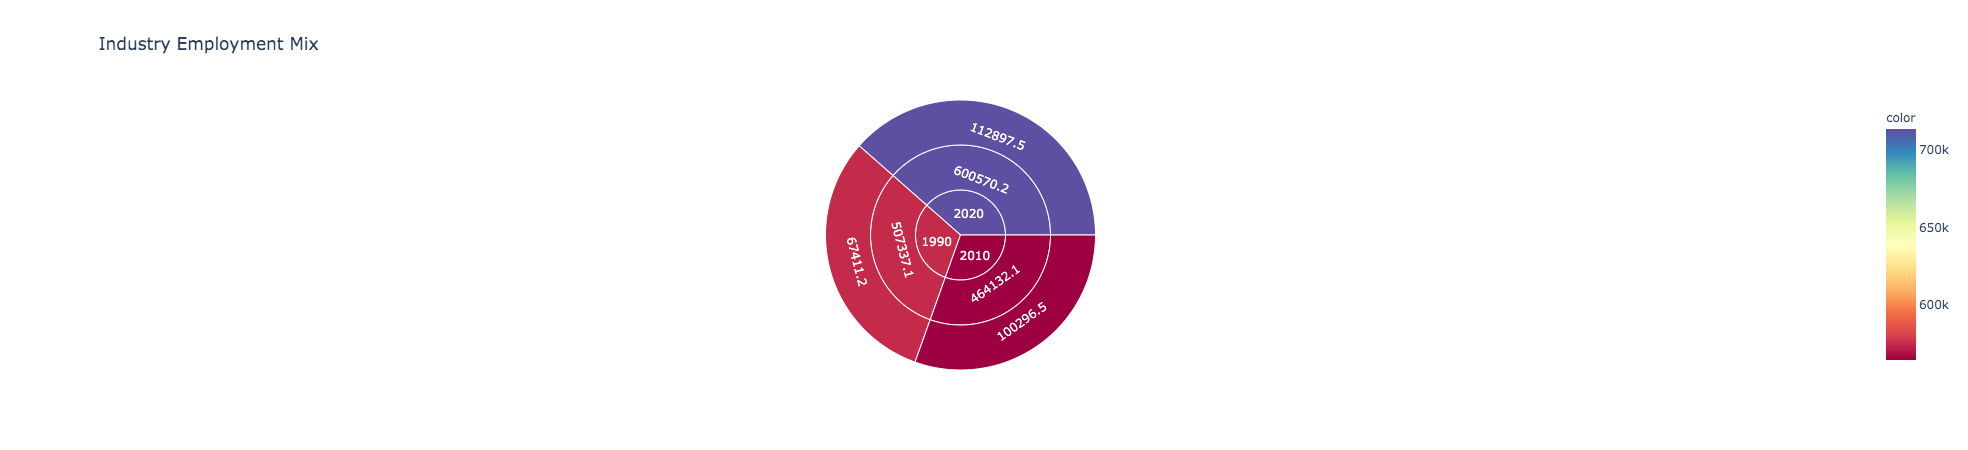

In [100]:
fig = px.sunburst(emp_airline_total,
               path=[Year, Full, Part],
               values= Total,
               color= color,
               hover_data=[hover, hover1],
               color_continuous_scale= 'spectral',
               title='Industry Employment Mix',
               
               
)
fig.show()

In [101]:
# Line Plot for Employment Data over time
cb_airline_data.rename(columns={'DAL_Total': 'Delta Airlines Total', 'LUV_Total': 'Southwest Airlines Total', 'UAL_Total' : 'United Airlines Total'}, inplace=True)
employment_plot = cb_airline_data.hvplot(title='Airline Employment Data', width = 900, height = 500)

In [102]:
#Function to Plot the Fundamental Data 
def Make_Fnd_Charts():
    charts_dict = {
          'revenue'  :revenue.hvplot(rot=90,width=900,height=600,title='Quarterly Revenue from 2011 to 2021').opts(shared_axes=False)
        , 'GPM'      :gpm.hvplot(rot=90,width=900,height=600,title='Quarterly Gross Profit Margin from 2011 to 2021').opts(shared_axes=False)
        , 'NPM'      :npm.hvplot(rot=90,width=900,height=600,title='Quarterly Net Profit Margin from 2011 to 2021').opts(shared_axes=False)
        , 'NI'       :profit.hvplot(rot=90,width=900,height=600,title='Quarterly Net Income from 2011 to 2021').opts(shared_axes=False)
        , 'EPS'      :EPS.hvplot(rot=90,width=900,height=600,title='Quarterly EPS from 2011 to 2021').opts(shared_axes=False)
        , 'QR'       :qr.hvplot(rot=90,width=900,height=600,title='Quarterly Quick Ratio from 2011 to 2021').opts(shared_axes=False)
        , 'OPM'      :opm.hvplot(rot=90,width=900,height=600,title='Quarterly Operating Margin from 2011 to 2021').opts(shared_axes=False)
        , 'Cash'     :cash.hvplot(rot=90,width=900,height=600,title='Quarterly Cash from 2011 to 2021').opts(shared_axes=False)
        , 'StkPrice' :price.hvplot(rot=90,width=900,height=600,title='Quarterly Stock Price from 2011 to 2021').opts(shared_axes=False)
        , 'ROE'      :roe.hvplot(rot=90,width=900,height=600,title='Quarterly ROE from 2011 to 2021').opts(shared_axes=False)
        , 'PER'      :per.hvplot(rot=90,width=900,height=600,title='Quarterly PE Ratio from 2011 to 2021').opts(shared_axes=False)
        , 'PSR'      :ps.hvplot(rot=90,width=900,height=600,title='Quarterly PS Ratio from 2011 to 2021').opts(shared_axes=False)
    }
    return charts_dict

In [103]:
All_Fund_Charts = Make_Fnd_Charts()

In [105]:
#Fundamentals Tab
fund_row0 =pn.pane.Markdown("### Financial Statement Analysis")
fund_row1 = pn.Row(All_Fund_Charts['revenue'], All_Fund_Charts['NI'])
fund_row2 = pn.Row(All_Fund_Charts['GPM'],All_Fund_Charts['NPM'])
fund_row3 = pn.Row(All_Fund_Charts['OPM'],All_Fund_Charts['QR'])
fund_row4 = pn.Row(All_Fund_Charts['ROE'],All_Fund_Charts['PER'])
fund_row5 = pn.Row(All_Fund_Charts['EPS'],All_Fund_Charts['StkPrice'])
fund_row6 = pn.Row(All_Fund_Charts['PSR'], All_Fund_Charts['Cash'])
fund_panel = pn.Column(
                         fund_row0
                        , fund_row1
                        , fund_row2
                        , fund_row3
                        , fund_row4
                        , fund_row5
                        , fund_row6
    
                )

# Dashboard Header

dashboard_col = pn.pane.Markdown('# **Investigation on Valuation of US Airline Industry in midst of Pandemic**')

In [106]:
# Created Variables for dashboard
passenger_panel0= pn.pane.Markdown("### US Airline Passengers for the Industry and 3 Major Airlines")
passenger_panel1 = pn.Row(passenger_lst [0] + passenger_lst [1])
passenger_panel2 = pn.Row(passenger_lst [2] + passenger_lst [3])
passenger_panel3 = pn.Column(passenger_panel0,passenger_panel1 , passenger_panel2)

flights_panel1 = pn.Row(flight_lst [0] + flight_lst [1])
flights_panel2 = pn.Row(flight_lst [2] + flight_lst [3])
flights_panel3 = pn.Column(flights_panel1, flights_panel2)

passenger_miles_notes = pn.pane.Markdown("### According to the Bureau of Transportation Statistics (2021), A revenue passenger mile (RPM) is a transportation industry metric that shows the number of miles traveled by paying passengers and is typically an airline traffic statistic. Revenue passenger miles are calculated by multiplying the number of paying passengers by the distance traveled. For example, an airplane with 100 passengers that flies 250 miles has generated 25,000 RPM." )
passenger_miles_notes2 = pn.pane.Markdown("### Revenue passenger miles are the backbone of most transportation metrics. RPM is often compared to available seat miles (ASM), a measure of an airplane's total carrying capacity available to generate income. By dividing RPM by ASM, an airline can calculate load factors. The load factor is a percentage indicating how effective the airline is at selling seats and earning revenue. Higher load factors, obviously, are desired because empty seats are an opportunity cost for an airline. ")
passenger_miles_panel1 = pn.Row(passenger_miles_lst [0] + passenger_miles_lst [1])
passenger_miles_panel2 = pn.Row(passenger_miles_lst [2] + passenger_miles_lst [3])
passenger_miles_panel3 = pn.Column(passenger_miles_notes, passenger_miles_notes2, passenger_miles_panel1, passenger_miles_panel2)

seat_notes = pn.pane.Markdown("### According to Investopedia (2020), available seat miles (ASM) is a measure of an airplane's carrying capacity available to generate revenues. Available seat miles refers to how many seat miles are actually available for purchase on an airline. Seat miles are calculated by multiplying the number of miles that a given airplane will be flying by the number of seats available for a given flight. ")
seat_miles_panel1 = pn.Row(seat_miles_lst [0] + seat_miles_lst [1])
seat_miles_panel2 = pn.Row(seat_miles_lst [2] + seat_miles_lst [3])
seat_miles_panel3 = pn.Column(seat_notes, seat_miles_panel1, seat_miles_panel2)

load_notes = pn.pane.Markdown("### According to the Air Transport Association (2020) , A high load factor indicates that an airline has full planes with most seats occupied by passengers. Airlines have high fixed costs associated with each flight. Every flight must have an entire flight crew and support staff, a well-maintained aircraft with enough fuel, and services that entertain and comfort customers. The load factor help investors understand how the airline covers expenses and generates a profit. A low load factor may be a cause for concern and may indicate an unprofitable airline.")
load_panel1 = pn.Row(load_factor_lst [0] + load_factor_lst [1])
load_panel2 = pn.Row(load_factor_lst [2] + load_factor_lst [3])
load_panel3 = pn.Column(load_notes, load_panel1, load_panel2)

employment_row0=pn.pane.Markdown("### US Airline Employment Data")
employment_row1=pn.Row(employment_plot, fig)
employment_panel = pn.Column(employment_row0,employment_row1)

welcomda_notes = " Bureau of Transportation Statistics - Aviation Data"

dashboard_welcome = " The dashboard presents a visual analysis of aviation data from All U.S. Carriers, Delta Airlines, Southwest Airlines, and United Airlines"

In [107]:
# Dashboard tabs

dashboard_tabs = pn.Tabs(
    ("Passenger" , passenger_panel3),
    ("Flights", flights_panel3),
    ("Passenger-Miles", passenger_miles_panel3),
    ("Seat-Miles", seat_miles_panel3),
    ("Load Factor", load_panel3),
    ("Labour", employment_panel),
    ("Fundamentals", fund_panel),
)

dashboard = pn.Column(dashboard_col
                      , dashboard_tabs
                      ,height_policy="auto"
)


In [109]:
dashboard

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(Layout)
            [2] Row
                [0] HoloViews(Layout)
        [1] Column
            [0] Row
                [0] HoloViews(Layout)
            [1] Row
                [0] HoloViews(Layout)
        [2] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Row
                [0] HoloViews(Layout)
            [3] Row
                [0] HoloViews(Layout)
        [3] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(Layout)
            [2] Row
                [0] HoloViews(Layout)
        [4] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(Layout)
            [2] Row
                [0] HoloViews(Layout)
        [5] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(NdOverlay)
                [1] Plotly(Figure)
        [6] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [2] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [3] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [4] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [5] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [6] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)

## **Serve the Dashboard**

In [70]:
dashboard.servable()

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(Layout)
            [2] Row
                [0] HoloViews(Layout)
        [1] Column
            [0] Row
                [0] HoloViews(Layout)
            [1] Row
                [0] HoloViews(Layout)
        [2] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Row
                [0] HoloViews(Layout)
            [3] Row
                [0] HoloViews(Layout)
        [3] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(Layout)
            [2] Row
                [0] HoloViews(Layout)
        [4] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(Layout)
            [2] Row
                [0] HoloViews(Layout)
        [5] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(NdOverlay)
                [1] Plotly(Figure)
        [6] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [2] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [3] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [4] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [5] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)